In [1]:
!pip install scikit-plot -q

In [1]:
import openpyxl #biblioteca para abrir arquivos em excel
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV # biblioteca para treino da arvore de decisão e otimização de hiperparâmetros
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor #para classificação e regressão as variáveis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix # biblioteca para métricas do modelo
from sklearn.ensemble import RandomForestClassifier
#bibliotecas para visualização das árvore arvore de decisão
from sklearn.tree import export_text
from sklearn import tree
from IPython.display import Image  
from io import StringIO 
from sklearn.tree import export_graphviz
import pydot 
from sklearn.datasets import load_iris
import graphviz

In [2]:
sns.set_style()
pd.set_option('display.max_columns', 25)

In [3]:
#carregando os dados
bd1 = pd.read_excel("defaultCreditcardClients.xls")

In [4]:
#vendo as variáveis/colunas e as primeiras linhas
bd1.head(10)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [5]:
bd1.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
# checando quantas linhas e colunas tem o dataset
bd1.shape

(30001, 24)

In [7]:
# Checando nomes e tipos de variáveis do dataset
bd1.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
# contagem dos principais dados do dataset
bd1.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001,30001
unique,82,3,8,5,57,12,12,12,12,11,11,22724,22347,22027,21549,21011,20605,7944,7900,7519,6938,6898,6940,3
top,50000,2,2,2,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


In [9]:
#verificando existência e quantidade dados nulos - não há dados nulos neste dataframe
bd1.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [10]:
# Aqui retiramos a linha onde tinha apenas o nome da variável, pois esta estava sendo contada como valor sem o ser.
#Logo, bd1_copy é o mesmo bd1 só que sem os cabeçalhos descritivos
bd1_copy = bd1.iloc[1:]
bd1_copy

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


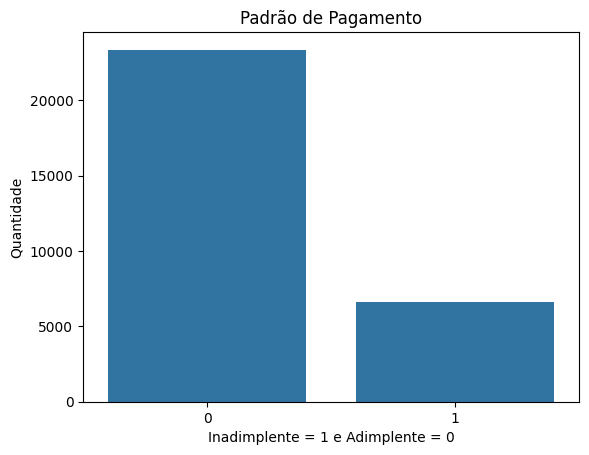

Proporção de Inadimplência:
Y
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [63]:
#histograma as operações regulares de das operações tipo fraude
fig, ax = plt.subplots()
sns.countplot(x='Y', data=bd1_copy, ax=ax)
ax.set_title("Padrão de Pagamento")
ax.set_xlabel("Inadimplente = 1 e Adimplente = 0")
ax.set_ylabel("Quantidade")
plt.show()
print(f"Proporção de Inadimplência:\n{bd1_copy.Y.value_counts(normalize=True)}")

In [12]:
# Dividindo os dados em features eixo(X) e variável alvo eixo(y)
X = bd1_copy.drop(['Y'],  axis=1)
y = bd1_copy['Y'].astype(int)

In [13]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# criação do modelo de árvore de decisão regressora
infra_tree = DecisionTreeRegressor(random_state=42)
infra_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [15]:
# Extração das variáveis mais importantes
infra_features = infra_tree.feature_importances_

# Gerando um DataFrame as features com seus devidos pesos.
df_infra_features = pd.DataFrame({'Feature': X.columns, 'Peso': infra_features})

# Ordenando o DataFrame pelo peso.
df_infra_features = df_infra_features.sort_values(by='Peso', ascending=False)

# Exibindo features mais importantes
print("Features Mais Importantes por ordem decrescente de peso:")
print(df_infra_features.head())


Features Mais Importantes por ordem decrescente de peso:
   Feature      Peso
5       X6  0.163159
11     X12  0.068286
4       X5  0.063994
19     X20  0.058765
0       X1  0.058603


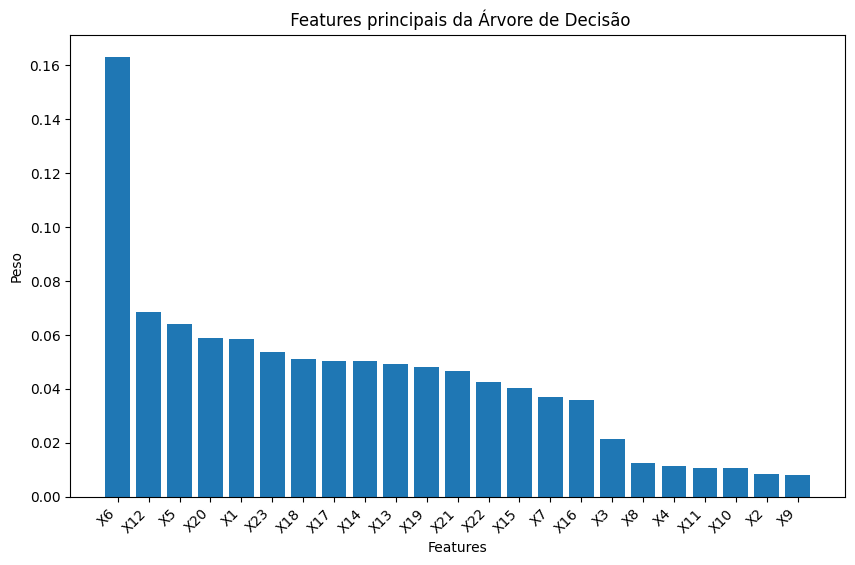

In [16]:
# Crie um gráfico de barras para visualizar as importâncias das features
plt.figure(figsize=(10, 6))
plt.bar(df_infra_features['Feature'], df_infra_features['Peso'])
plt.xlabel('Features')
plt.ylabel('Peso')
plt.title(' Features principais da Árvore de Decisão')
plt.xticks(rotation=45, ha='right')
plt.show()

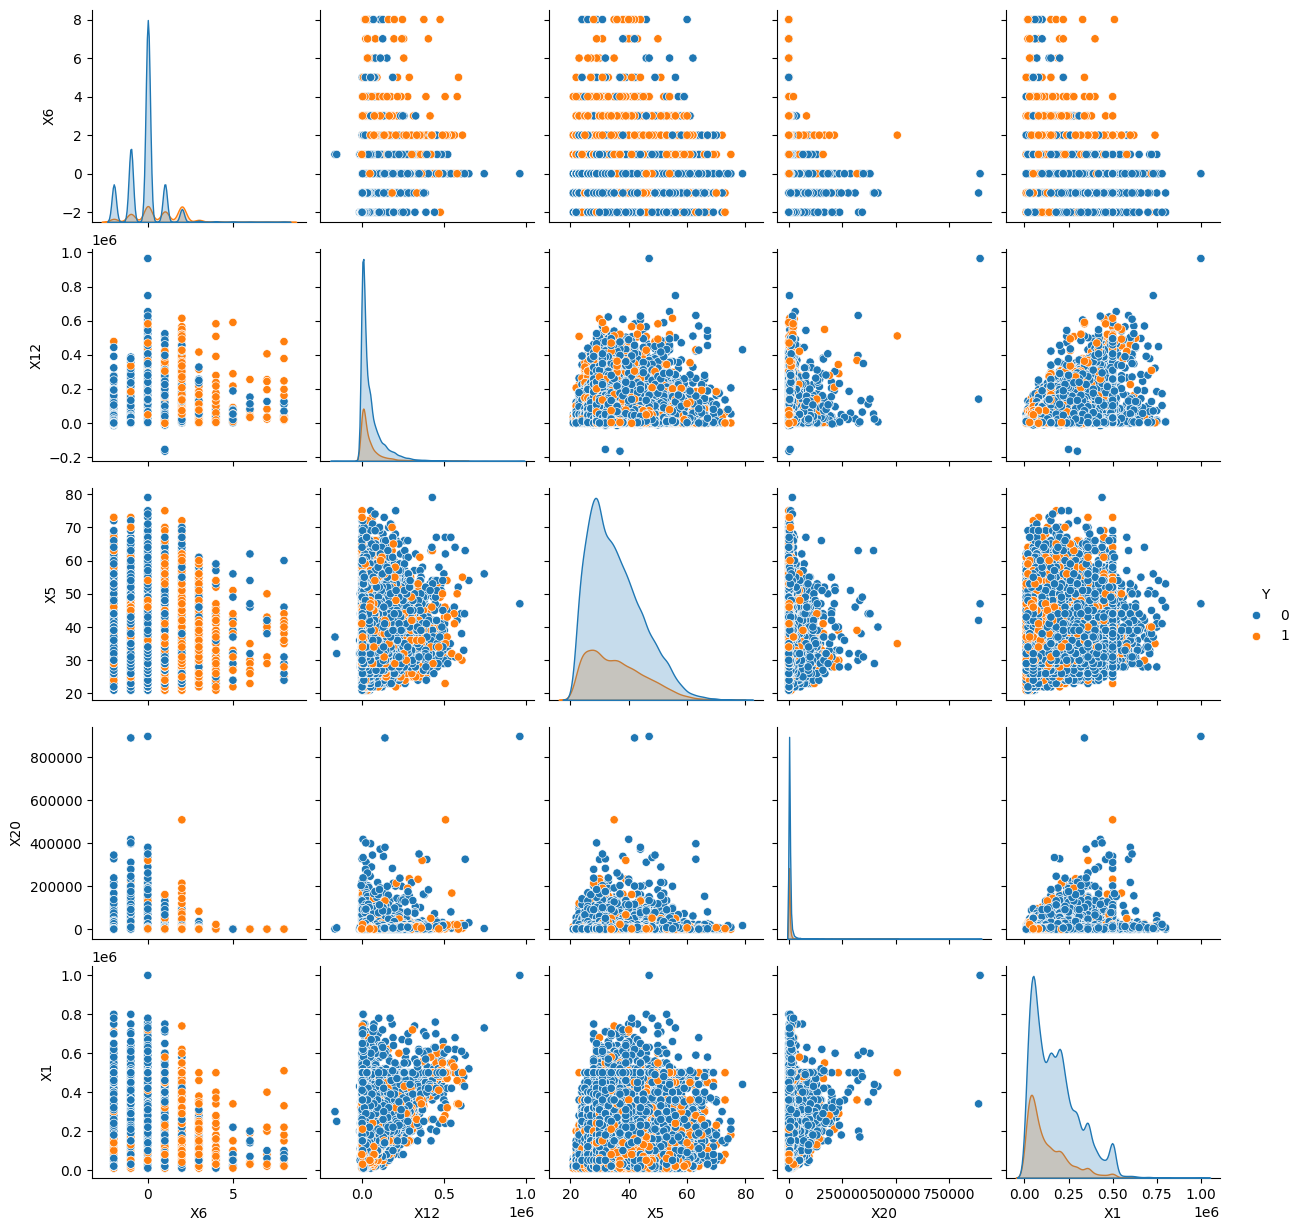

In [17]:
# diagrama de dispersão dos dados com combinações entre as 5 primeiras variáveis mais importantes combinadas com a variável "Y"
#fraude ou op. regular. Este pairplot foi feito somente com as 5 variáveis de maior peso por uma razão computacional, com todas 
#as variáveis demoraria muito mais tempo.
sns.pairplot(bd1_copy, hue='Y', vars=['X6', 'X12', 'X5', 'X20','X1'])
plt.show()

### Visualização da arvore de decisão

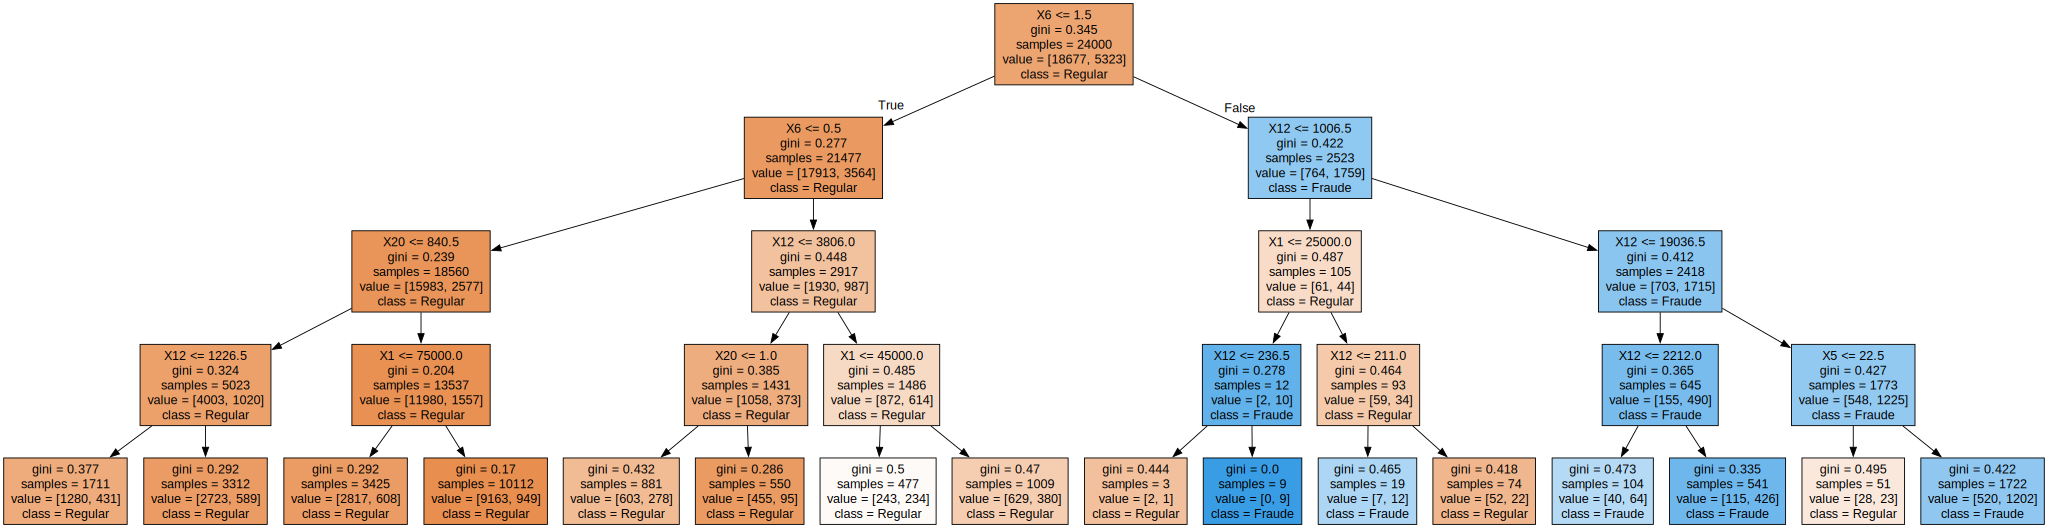

In [18]:
# para visualização da arvore de decisão foi feito um terinamento com um dataframe reduzido devido ao fato de não ser possível 
# gerar uma visualização legível com todas as variáveis do dataframe.

import os
import graphviz


#este atributo foi criado apenas para a visualização da arvore de decisão
bd1_small=bd1_copy[['X6', 'X12', 'X5', 'X20','X1','Y']] 
X = bd1_small.drop(columns=['Y'],  axis=1)
y = bd1_small['Y'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_infra_small = DecisionTreeClassifier(random_state=42, max_depth=4)
model_infra_small.fit(X_train,y_train)
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# DOT data
dot_data = tree.export_graphviz(model_infra_small, out_file=None,
feature_names=['X6', 'X12', 'X5', 'X20','X1'],
class_names=['Regular', 'Fraude'],
filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
#graph.render('arvore_1', format='png', cleanup=True)
graph

## Avaliando a Árvore de decisão

In [19]:
# Dividindo os dados em features eixo(X) e variável alvo eixo(y)
X = bd1_copy.drop(columns=['Y'],  axis=1)
y = bd1_copy['Y'].astype(int)

In [20]:
# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# criação do modelo de árvore de decisão
model_infra = DecisionTreeClassifier()
model_infra.fit(X_train, y_train)


DecisionTreeClassifier()

In [22]:
param_grid = {
      'max_depth': [1,2,3,4,5,6,7,8,9,10] 
}
## testes com 'min_samples_split' e 'min_samples_leaf' foram realizados, mas em nada contribuíram para a precisão e acurácia do modelo
#GridSearchCV
grid_search = GridSearchCV(model_infra, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Melhores parâmetros encontrados pelo GridSearch:", grid_search.best_params_) 

Melhores parâmetros encontrados pelo GridSearch: {'max_depth': 4}


In [23]:
predictions = model_infra.predict(X_test)

In [24]:
# Avalie o modelo com os melhores parâmetros no conjunto de teste
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.67      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.66      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [25]:
print(confusion_matrix(y_test,predictions))

[[3816  871]
 [ 771  542]]


## Comparando com o modelo de Florestas aleatórias

In [53]:
model_rfc = RandomForestClassifier()

In [54]:
param_grid = {
    'n_estimators': [50,100,150,200], 
     'max_depth': [1,2,3,4,5,6,7,8,9,10],
}
## testes com 'min_samples_split' e 'min_samples_leaf' foram realizados, mas em nada contribuíram para a precisão e acurácia do modelo
#GridSearchCV
grid_search = GridSearchCV(model_rfc, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Melhores parâmetros encontrados pelo GridSearch:", grid_search.best_params_) 

Melhores parâmetros encontrados pelo GridSearch: {'max_depth': 8, 'n_estimators': 50}


In [56]:
y_pred1 = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.32      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [57]:
print(confusion_matrix(y_test,y_pred1))

[[4498  189]
 [ 897  416]]


In [58]:
random_search = RandomizedSearchCV(model_rfc, param_distributions=param_grid, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
print("Melhores parâmetros encontrados pelo RandomizedSearch:", random_search.best_params_)


Melhores parâmetros encontrados pelo RandomizedSearch: {'n_estimators': 200, 'max_depth': 4}


In [59]:
# Avalie o modelo com os melhores parâmetros no conjunto de teste
y_pred2 = random_search.best_estimator_.predict(X_test)


In [60]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4687
           1       0.69      0.31      0.43      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.64      0.66      6000
weighted avg       0.80      0.82      0.79      6000



In [61]:
print(confusion_matrix(y_test,y_pred2))

[[4508  179]
 [ 907  406]]


### Visualização da Floresta Aleatória

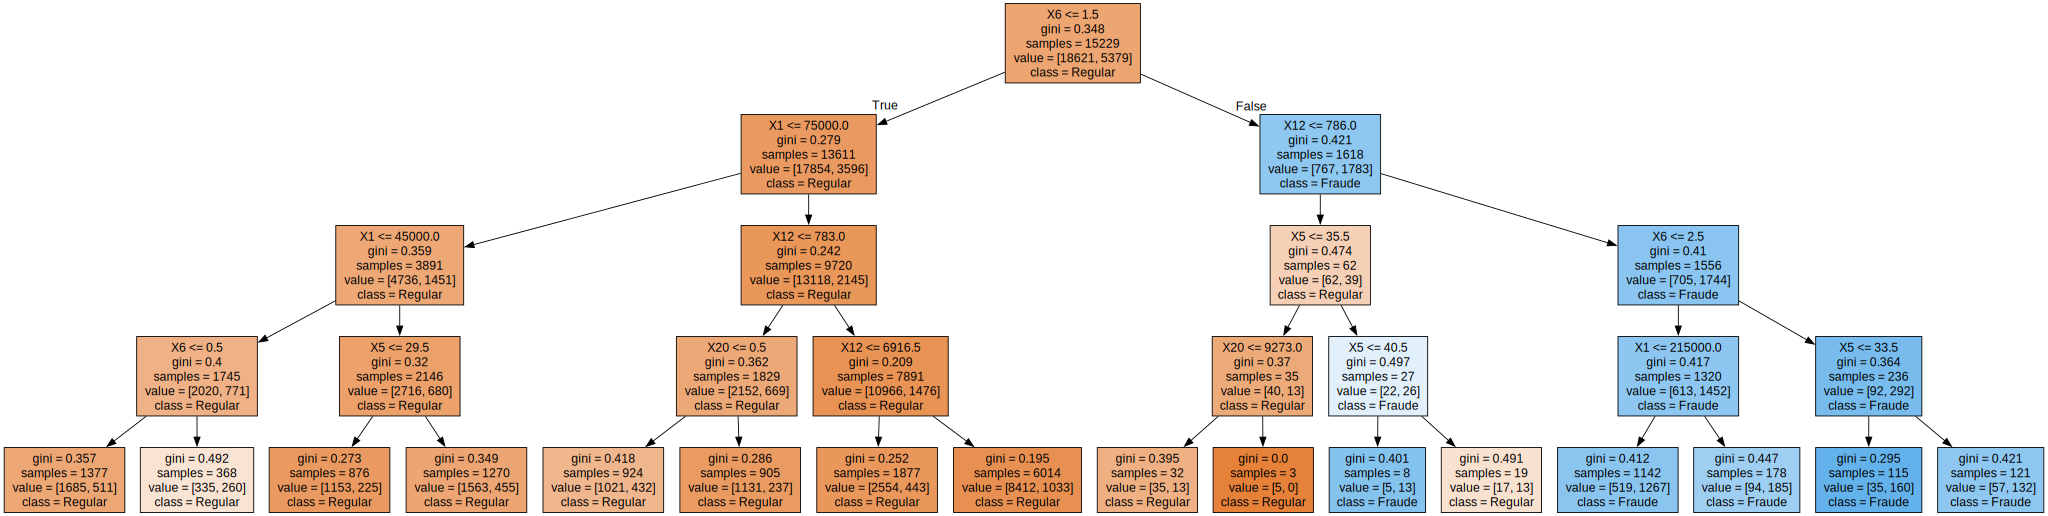

In [33]:
# para visualização da floresta aleatória foi feito um treinamento com um dataframe reduzido devido ao fato de não ser possível 
# gerar uma visualização legível com todas as variáveis do dataframe.

from sklearn.ensemble import RandomForestClassifier
import os
import graphviz


#este atributo foi criado apenas para a visualização da arvore de decisão
bd1_small=bd1_copy[['X6', 'X12', 'X5', 'X20','X1','Y']] 
X = bd1_small.drop(columns=['Y'],  axis=1)
y = bd1_small['Y'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rfc = RandomForestClassifier(n_estimators=4, max_depth=4,  random_state=42)
model_rfc.fit(X_train, y_train)

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

# DOT data
base_tree = model_rfc.estimators_[0] 
dot_data = tree.export_graphviz(base_tree, out_file=None,
feature_names=['X6', 'X12', 'X5', 'X20','X1'],
class_names=['Regular', 'Fraude'],
filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
#graph.render('arvore_1', format='png', cleanup=True)
graph